In [1]:
# Import Modules

import urllib
import json
from pprint import pprint
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:

url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "8c233bc2-1879-44ff-a0e4-9b69a9032c54"}
response = urllib.request.urlopen(url, data=bytes(json.dumps(params), encoding="utf-8"))
package = json.loads(response.read())
pprint(package)

{'help': 'https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/help_show?name=package_show',
 'result': {'creator_user_id': '150d5301-86ec-44a3-a070-50f2cea839c9',
            'dataset_category': 'Document',
            'excerpt': 'This dataset contains non-identifiable information '
                       'relating to each parking ticket issued for each '
                       'calendar year since 2008.',
            'formats': 'XLS,ZIP',
            'groups': [],
            'id': '8c233bc2-1879-44ff-a0e4-9b69a9032c54',
            'information_url': 'http://www.toronto.ca/pay-toronto-tickets/parkingtickets/index.htm',
            'is_retired': False,
            'isopen': True,
            'last_refreshed': '2019-07-23T17:51:57.153365',
            'license_id': 'other-open',
            'license_title': 'Other (Open)',
            'metadata_created': '2019-07-23T17:50:14.331462',
            'metadata_modified': '2019-11-06T15:23:09.564050',
            'name': 'parking-ti

In [3]:
# Get the data url for year 2016
filedata_2016_url = package["result"]["resources"][8]["url"]
filedata_2016_url

'https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/8c233bc2-1879-44ff-a0e4-9b69a9032c54/resource/1044f9dc-208f-4011-895c-9497b8b9912a/download/parking-tickets-2016.zip'

In [ ]:
# how to download the file from the above url
import requests
data_2016 = requests.get(filedata_2016_url)

In [ ]:
#store the downloaded file in the parking2018.zip 
open('Resourses/parking2016.zip', 'wb').write(data_2016.content)

In [ ]:
# extract all the files from the zip folder to current working directory
from zipfile import ZipFile

In [ ]:
# Unzip the zipfile
with ZipFile("Resourses/parking2016.zip","r") as zfile:
    zfile.extractall("Resourses")

In [2]:
# Create all four pandas data frames
data1 = pd.read_csv("Resourses/Parking_Tags_Data_2016_1.csv")
data2 = pd.read_csv("Resourses/Parking_Tags_Data_2016_2.csv")
data3 = pd.read_csv("Resourses/Parking_Tags_Data_2016_3.csv")
data4 = pd.read_csv("Resourses/Parking_Tags_Data_2016_4.csv")

In [3]:
complete_data = pd.concat([data1,data2,data3,data4])
complete_data


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***03850,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,0.0,NR,49 GLOUCESTER ST,NaN,NaN,ON
1,***03851,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,1.0,NR,45 GLOUCESTER ST,NaN,NaN,ON
2,***98221,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,274 GEORGE ST,NaN,NaN,ON
3,***85499,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,2.0,NR,270 GEORGE ST,NaN,NaN,ON
4,***03852,20160101,406.0,PARK-VEH. W/O VALID ONT PLATE,40,2.0,NR,45 GLOUCESTER ST,NaN,NaN,ON
5,***16117,20160101,3.0,PARK ON PRIVATE PROPERTY,30,3.0,NaN,621 KING ST W,NaN,NaN,ON
6,***03853,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,3.0,NR,43 GLOUCESTER ST,NaN,NaN,ON
7,***03854,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,4.0,NR,39 GLOUCESTER ST,NaN,NaN,ON
8,***03855,20160101,406.0,PARK-VEH. W/O VALID ONT PLATE,40,4.0,NR,39 GLOUCESTER ST,NaN,NaN,ON
9,***03856,20160101,29.0,PARK PROHIBITED TIME NO PERMIT,30,5.0,NR,31 GLOUCESTER ST,NaN,NaN,ON


In [4]:
# Fill the NaN cells with nothing inside it
new_data = complete_data.fillna("")
new_data.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***03850,20160101,29,PARK PROHIBITED TIME NO PERMIT,30,0,NR,49 GLOUCESTER ST,,,ON
1,***03851,20160101,29,PARK PROHIBITED TIME NO PERMIT,30,1,NR,45 GLOUCESTER ST,,,ON
2,***98221,20160101,29,PARK PROHIBITED TIME NO PERMIT,30,2,NR,274 GEORGE ST,,,ON
3,***85499,20160101,29,PARK PROHIBITED TIME NO PERMIT,30,2,NR,270 GEORGE ST,,,ON
4,***03852,20160101,406,PARK-VEH. W/O VALID ONT PLATE,40,2,NR,45 GLOUCESTER ST,,,ON


In [5]:
# Group data set by dates
grouped_data = new_data.groupby("date_of_infraction")

In [6]:
# Show the grouped data
grouped_data.first().head()

,tag_number_masked,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
date_of_infraction,,,,,,,,,,
20160101,***03850,29.0,PARK PROHIBITED TIME NO PERMIT,30,0.0,NR,49 GLOUCESTER ST,,,ON
20160102,***05092,3.0,PARK ON PRIVATE PROPERTY,30,0.0,AT,1714 QUEEN ST E,,,ON
20160103,***05172,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,40,0.0,NR,1405 DANFORTH AVE,,,ON
20160104,***77280,30.0,STOP-(ON/OVER) (SIDEWK/FTPATH),60,0.0,RR,618 GLENGROVE AVE,,,ON
20160105,***44286,29.0,PARK PROHIBITED TIME NO PERMIT,30,0.0,NR,269 WOBURN AVE,,,ON


In [53]:
# Get the address at which each infraction took place with date
# Create a blank dictionary to store addresses for specific dates
address_book = {}

# Loop through each date and extract addresses for the same day
for date in grouped_data:
    # Create a blank list to store addresses for the same day
    address = []
    # date_data represent a data set for a specific day, e.g. 20160101
    date_data = pd.DataFrame(date[1]) # Transfer the tuple into data frame
    for index, row in date_data.iterrows():
        # Adding all the addresses up into a list
        if row["location3"] != "":
            # if it is an interscetion of 2 streets
            address.append(str(row["location2"]+" / "+row["location4"])) 
        else:
            # if only a street with unit number
            address.append(str(row["location2"]))
        address_book[date[0]] = address # update the address_book dict, date[0] is the date, e.g. 20160101

In [54]:
address_book[20161231][-15]

'THE ESPLANADE / LOWER SHERBOURNE ST'

In [9]:
new_data.dtypes

tag_number_masked         object
date_of_infraction         int64
infraction_code           object
infraction_description    object
set_fine_amount            int64
time_of_infraction        object
location1                 object
location2                 object
location3                 object
location4                 object
province                  object
dtype: object

In [25]:
# Organize the data frame by seasons
# From the internet, 
# Spring - March 20 to June 20. Spring is a rainy season in most parts of Ontario. ...
# Summer - June 21 to September 21. ...
# Fall (or Autumn) - September 22 to December 20. ...
# Winter - December 21 to March 19.
spring = new_data.loc[(new_data["date_of_infraction"]>=20160320) & (new_data["date_of_infraction"]<=20160620),:]
summer = new_data.loc[(new_data["date_of_infraction"]>=20160621) & (new_data["date_of_infraction"]<=20160921),:]
fall = new_data.loc[(new_data["date_of_infraction"]>=20160922) & (new_data["date_of_infraction"]<=20161220),:]
winter = new_data.loc[(new_data["date_of_infraction"]>=20161221) | (new_data["date_of_infraction"]<=20160319),:]

num_tickets_spring = len(spring)
num_tickets_summer = len(summer)
num_tickets_fall = len(fall)
num_tickets_winter = len(winter)



([<matplotlib.axis.YTick at 0x1508a5d7320>,
 <a list of 6 Text yticklabel objects>)

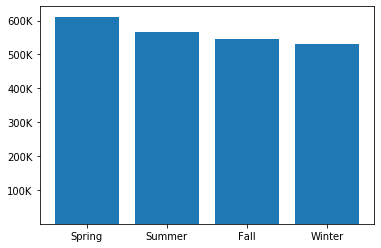

In [49]:
plt.bar([1,2,3,4],[num_tickets_spring, num_tickets_summer, num_tickets_fall, num_tickets_winter])
plt.xticks([1,2,3,4],["Spring", "Summer", "Fall", "Winter"])
plt.yticks([100000,200000,300000,400000,500000,600000],["100K","200K","300K","400K","500K","600K"])

In [35]:
num_tickets_spring

611318